In [ ]:
import numpy as np
from JuxtaposedDataset import JuxtaposedDataset
from matplotlib import pyplot as plt
from torchvision import transforms as T
from TranslationDataset import TranslationDataset

In [ ]:
transforms = T.Compose([
        T.ToTensor()
    ])

In [ ]:
j_data = JuxtaposedDataset(transforms)

In [1]:
first_j_data = j_data[0]
img, number, index1, index2 = first_j_data
number

14

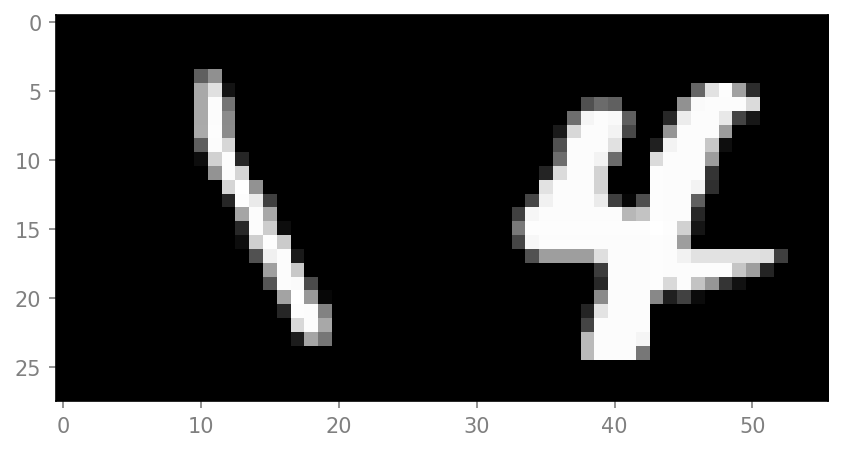

In [2]:
np_img = np.transpose(img.numpy(), (1,2,0))
plt.imshow(np_img, cmap=plt.cm.gray)

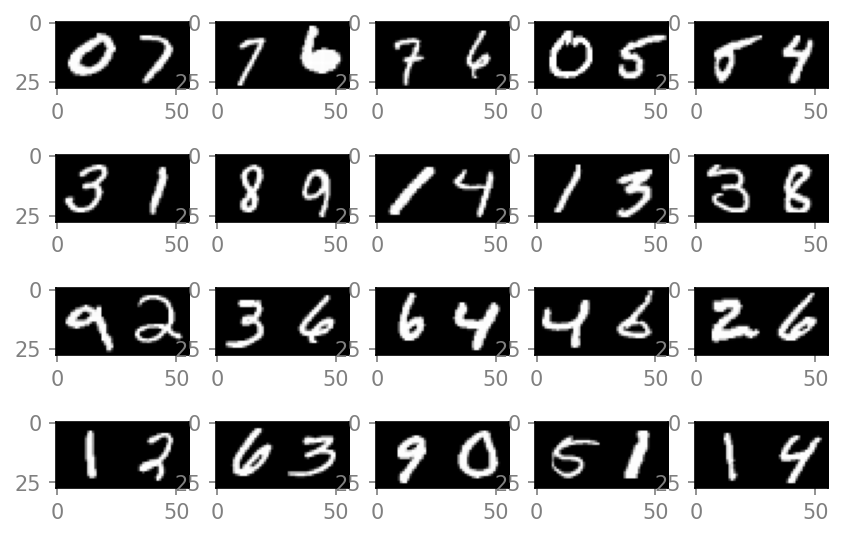

In [3]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(j_data[i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

In [ ]:
t_data = TranslationDataset(transforms=transforms)

In [4]:
first_t_data = t_data[0]
img, label, translation = first_t_data
label, translation

(5, (1, 0, 0, 0, 1, 0))

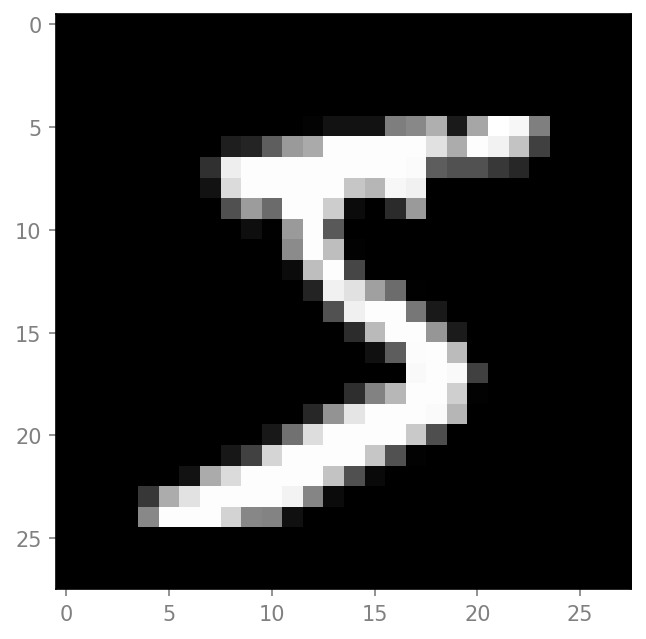

In [5]:
np_img = np.transpose(img.numpy(), (1,2,0))
plt.imshow(np_img, cmap=plt.cm.gray)

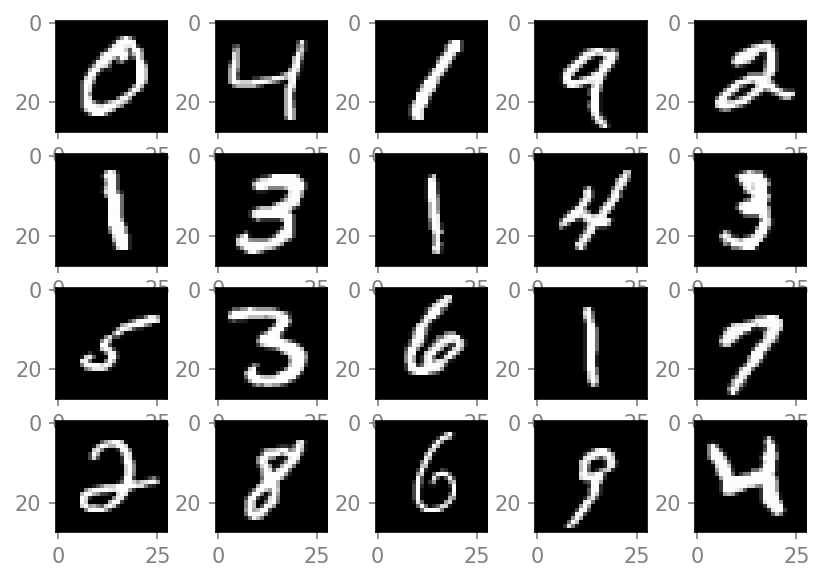

In [6]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

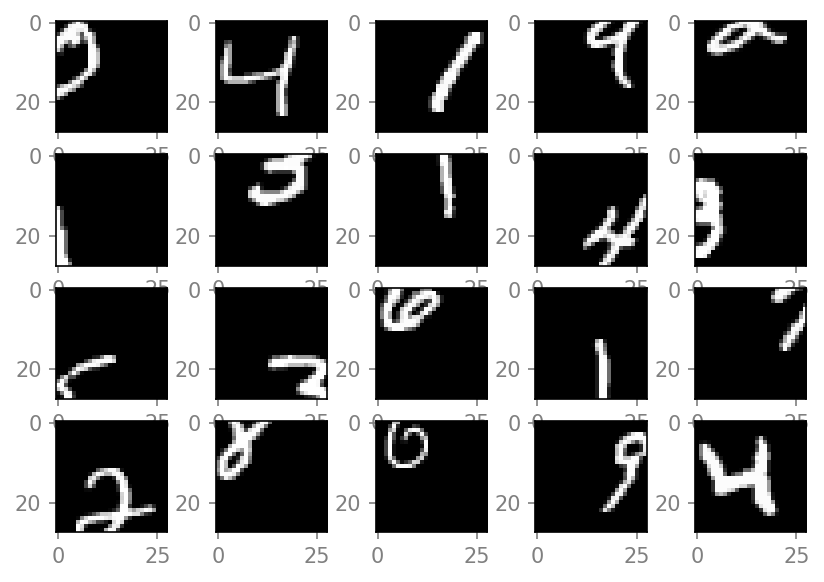

In [7]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[60000 + i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

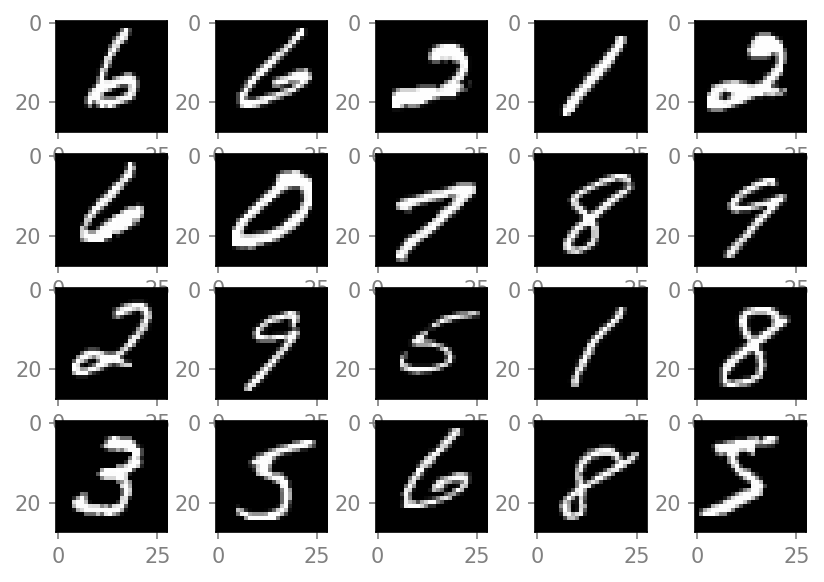

In [8]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[60000 - 20 + i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

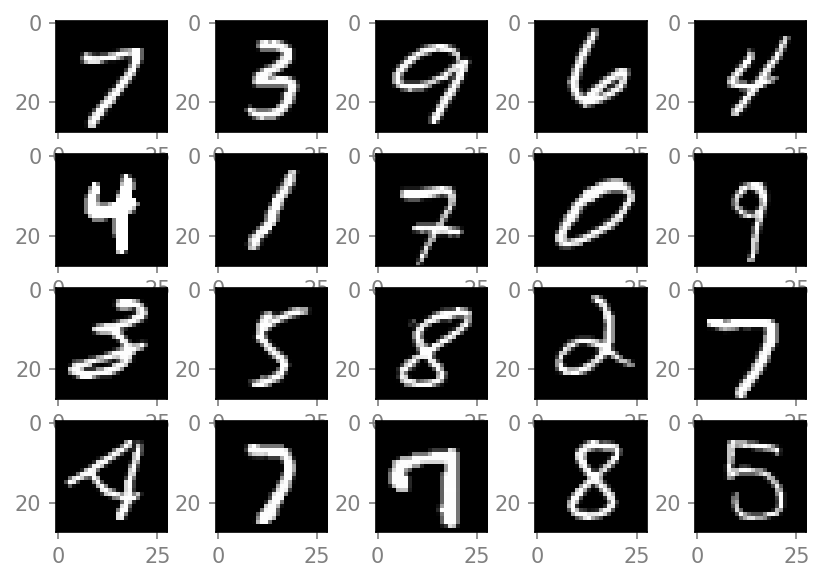

In [9]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[30000 + i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)

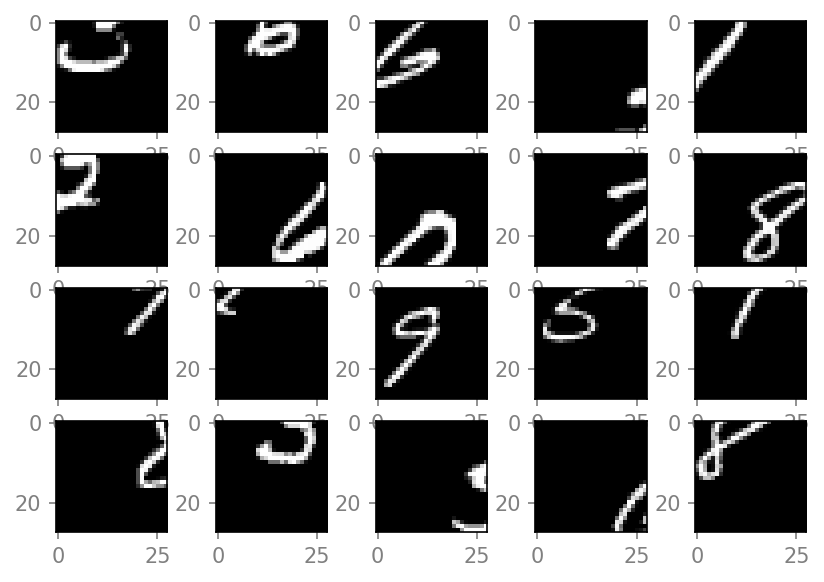

In [10]:
plt.figure(figsize=(15, 10))
for i in range(1, 21):
    plt.subplot(4, 5, i)
    np_img = np.transpose(t_data[119999 - 20 + i][0].numpy(), (1,2,0))
    plt.imshow(np_img, cmap=plt.cm.gray)